In [1]:
#Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [3]:
bos.columns=boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston.target[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [5]:
bos['PRICE']=boston.target

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
x=bos.drop('PRICE',axis=1)

In [8]:
lm=LinearRegression()

In [9]:
lm.fit(x,bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print('Estimated intercept coeff',lm.intercept_)

Estimated intercept coeff 36.4911032804


In [11]:
print('number of coeff',len(lm.coef_))

number of coeff 13


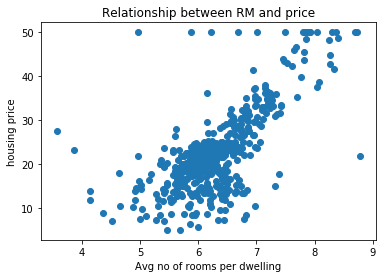

In [14]:
plt.scatter(bos.RM,bos.PRICE)
plt.xlabel('Avg no of rooms per dwelling')
plt.ylabel('housing price')
plt.title('Relationship between RM and price')
plt.show()

In [15]:
lm.predict(x)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

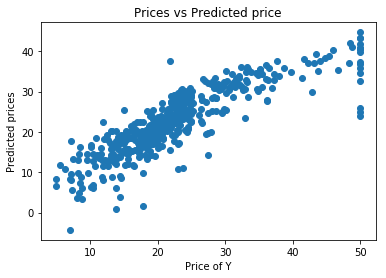

In [16]:
plt.scatter(bos.PRICE,lm.predict(x))
plt.xlabel('Price of Y')
plt.ylabel('Predicted prices')
plt.title('Prices vs Predicted price')
plt.show()

In [17]:
msefull=np.mean((bos.PRICE-lm.predict(x))**2)
print (msefull)

21.8977792176875


In [29]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,bos.PRICE,test_size=0.33,random_state=5)

In [28]:
import sklearn
print (sklearn.__version__)

0.19.1


In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [33]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred_train=lm.predict(x_train)
pred_test=lm.predict(x_test)

In [35]:
print('Fit model x_train and calculate MSE with Y train')
np.mean((y_train-lm.predict(x_train))**2)

Fit model x_train and calculate MSE with Y train


19.546758473534673

In [36]:
print('Fit model x_train and calculate MSE with x_test,y_test')
np.mean((y_test-lm.predict(x_test))**2)

Fit model x_train and calculate MSE with x_test,y_test


28.541367275618654

In [53]:
plt.scatter(lm.predict(x_train),lm.predict(x_train)-y_train,c='blue',s=40,alpha=0.5)

In [54]:
plt.scatter(lm.predict(x_test),lm.predict(x_test)-y_test,c='green',s=40,alpha=0.5)

In [55]:
plt.hlines(y=0,xmin=0,xmax=50)

In [56]:
plt.title('Residual plots using training set blue and test set green')

Text(0.5,1,'Residual plots using training set blue and test set green')

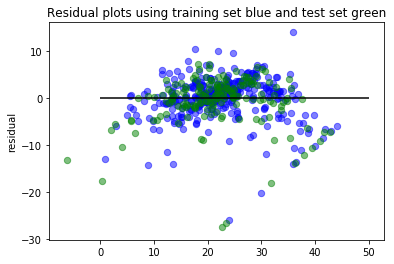

In [57]:
plt.ylabel('residual')
plt.show()